## Data Analysis Using Pandas
Data analysis is crucial for ensuring the accuracy of datasets. Clean data ultimately supports informed decision-making and improves overall data quality.

**Task: "Developing a Risk Assessment Framework for Investment in Low-Risk Aircraft"**
   
* This entails a comprehensive approach to assess aircraft risks, which displays a critical evaluation that will provide a structured framework for informed decision-making. 


## Business Understanding
As the company seeks to diversify into the aviation industry, the critical challenge of understanding the risks associated with different aircrafts is needed. The primary objective is to identify which aircraft present the lowest risk for both commercial and private operations. By analyzing data on aircraft accidents and injuries that aim to uncover trends that highlight safer options. 



## Data Understanding
In this dataset under the file path AviationData.csv there is a CSV file containing information about the NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

## The features of interest for this analysis will be:
To analyze the potential risks associated with purchasing and operating aircraft, we will focus on the following key features:
   * Key aircraft details—such as category, make and model, registration number (for tracking history), and the number and type of engines (which             influence performance and safety)—are crucial for our evaluation.

   * Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured: These metrics are important for evaluating the safety                of different aircraft.
   * Weather Condition: Analyze impact of weather on accidents.
   * Broad.phase.of.flight: To get an understanding where accidents occur(is it during landing,takeoff or cruising).
   * Event.Date: For analyzing trends over time.
   * Location: To understand geographical risk factors.
   * Country: For regional analysis.


## 1. Load the Data with Pandas
In the cell below, we:

* Import and alias pandas as pd
* Import and alias numpy as np
* Import and alias seaborn as sns
* Import and alias matplotlib.pyplot as plt
* Set Matplotlib visualizations to display inline in the notebook

In [7]:
import zipfile
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Setup
In the cell below,we import relevant libraries,unzip the csv file,open up the CSV file as a dataframe called **df**

In [4]:
with zipfile.ZipFile('archive (5).zip', 'r') as zip_ref:
    zip_ref.extractall() #extracts all the files in the csv

In [5]:
#import the file as a dataframe
df = pd.read_csv('AviationData.csv', encoding = 'latin1',low_memory= False) 

# Print the number of rows and columns in df
print(df.shape)

# Print the first five rows of df
df.head()


(88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


(88889, 31). The data has 88889 rows and 31 columns.

In [8]:
#prints all the columns in the dataframe
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [49]:
#lets check the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Missing Data: The first 4 columns are the only columns without any missing data.
Data Types: The data types of each column is provided in the cell above of which some of them might require to be changed to perform analysis.

## Data Cleaning

In [48]:
# Keep only the necessary columns
columns_to_keep = [
    'Event.Date', 'Location', 'Country', 'Injury.Severity',
    'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
    'Broad.phase.of.flight'
]
#removes any rows in the filtered DataFrame that contain missing values in any of the selected columns
df_clean = df[columns_to_keep].dropna()
df_clean

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,0.0,0.0,0.0,2.0,VMC,Takeoff
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,0.0,0.0,0.0,2.0,IMC,Landing
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,0.0,0.0,1.0,0.0,IMC,Cruise
13,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,0.0,0.0,0.0,IMC,Takeoff
14,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,1.0,0.0,0.0,0.0,IMC,Cruise
15,1982-01-02,"LITTLE ROCK, AR",United States,Fatal(2),Destroyed,Airplane,Beech,19,2.0,0.0,0.0,0.0,IMC,Cruise
16,1982-01-02,"MIDWAY, UT",United States,Non-Fatal,Destroyed,Helicopter,Enstrom,280C,0.0,0.0,0.0,1.0,IMC,Taxi
17,1982-01-02,"SKWENTA, AK",United States,Fatal(3),Destroyed,Airplane,Cessna,180,3.0,0.0,0.0,0.0,VMC,Unknown
18,1982-01-02,"GALETON, PA",United States,Non-Fatal,Substantial,Airplane,Cessna,172,0.0,0.0,0.0,1.0,VMC,Taxi
19,1982-01-02,"MIAMI, FL",United States,Non-Fatal,Substantial,Helicopter,Smith,WCS-222 (BELL 47G),0.0,0.0,0.0,2.0,VMC,Cruise


## Check for Missing Values

In [49]:
# Check for missing values
missing_values = df_clean.isnull().sum()
missing_values

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

## Check for duplicated values

In [52]:
# View duplicate rows
duplicate_rows = df_clean[df_clean.duplicated()]
duplicate_rows

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
1371,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,0.0,0.0,0.0,7.0,VMC,Cruise
2851,1982-09-23,"PONTIAC, MI",United States,Incident,Minor,Airplane,Cessna,152,0.0,0.0,0.0,3.0,VMC,Takeoff
3082,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,3.0,0.0,0.0,0.0,VMC,Cruise


There are 3 rows that are duplicated.

In [50]:
# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

In [51]:
# Count duplicate rows
duplicate_count = df_clean.duplicated().sum()
duplicate_count

0

In [55]:
df_clean.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,3582.000000,3582.000000,3582.000000,3582.000000
mean,0.399777,0.200726,0.277499,2.147683
std,1.101587,0.649507,1.094293,13.011314
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,27.000000,10.000000,33.000000,393.000000


## Data Analysis and Visualization

Visual 1: Accident Frequency by Aircraft Make


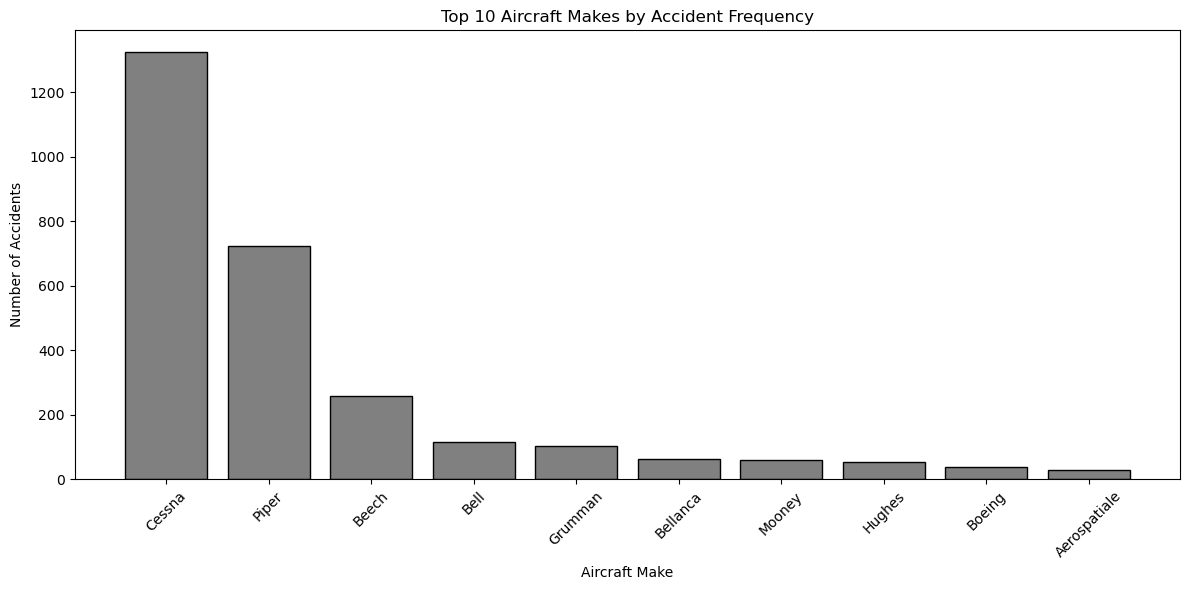

In [24]:

# Top 10 aircraft makes by accident frequency
accident_counts = df_clean['Make'].value_counts().head(10)
#creates the bar plot
plt.figure(figsize=(12, 6))
plt.bar(accident_counts.index, accident_counts.values, color='grey',edgecolor = 'black')
#sets the title
plt.title('Top 10 Aircraft Makes by Accident Frequency')
#sets the x axis and y axis
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
#sets the xticks
plt.xticks(rotation=45)
#displays the visualization
plt.tight_layout()
plt.savefig('Documents/Image1.png', format='png', dpi=300)
plt.show();

The chart provides a clear visualization of the accident frequency for the top 10 aircraft makes. It highlights which aircraft have been involved in the most incidents.
*  The make with the highest number of accidents is clearly identifiable. This information is crucial for understanding which aircraft might pose a higher risk to our operations.
*  The chart allows for a direct comparison among the top models, making it easier to gauge which aircraft are safer choices for the operation.


## Visual 2: Injury Severity Analysis by Aircraft Make

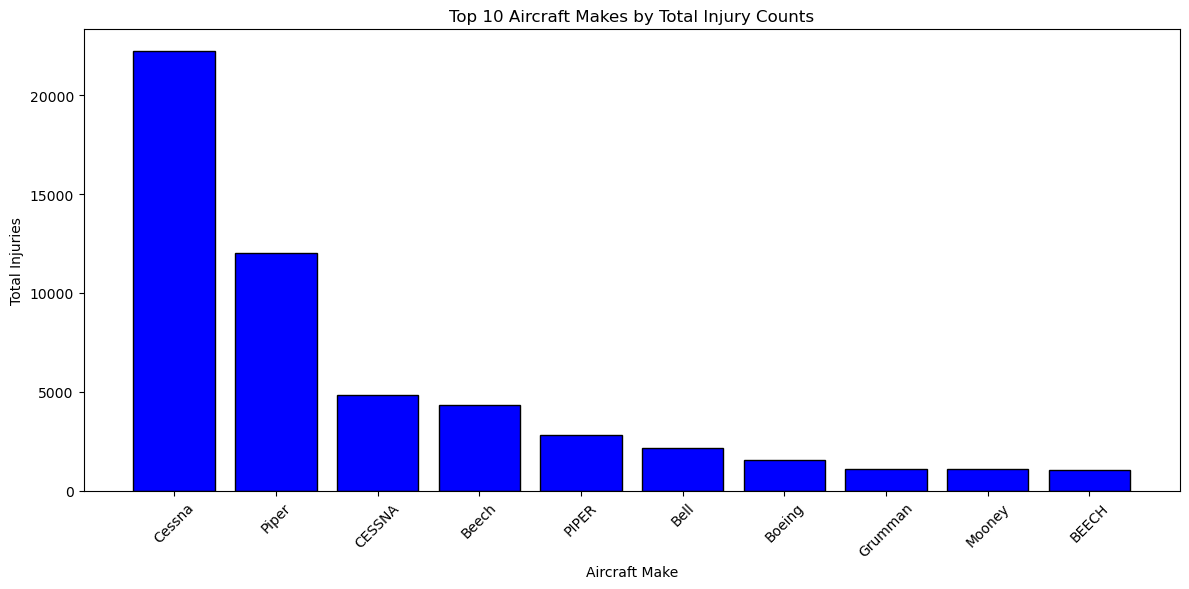

In [52]:
# Count total injuries per aircraft make
total_injuries = df.groupby('Make')['Injury.Severity'].count().sort_values(ascending=False).head(10)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the total injuries by aircraft make
ax.bar(total_injuries.index, total_injuries.values, color='blue',edgecolor = 'black')

# Set titles and labels
ax.set_title('Top 10 Aircraft Makes by Total Injury Counts')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Total Injuries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig('Documents/Image2.png', format='png', dpi=300)
plt.show();



The code groups the data by aircraft make and counts the total number of injury records for each make.
Identifying aircraft makes with high injury counts allows us to mitigate risks effectively. By avoiding or enhancing safety measures for these models, we can improve operational safety.

## 3."Total Injuries by Aircraft Category"

In [33]:
# Group by category and summarize injury counts
total_injuries_by_category = df.groupby('Aircraft.Category').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()

# Calculate total injuries
total_injuries_by_category['Total.Injuries'] = (
    total_injuries_by_category['Total.Fatal.Injuries'] +
    total_injuries_by_category['Total.Serious.Injuries'] +
    total_injuries_by_category['Total.Minor.Injuries']
)


total_injuries_by_category['Total.Injuries']

0     29577.0
1       414.0
2         3.0
3       324.0
4       129.0
5      3710.0
6       128.0
7         1.0
8         2.0
9         1.0
10        0.0
11       29.0
12       24.0
13       13.0
14      175.0
Name: Total.Injuries, dtype: float64

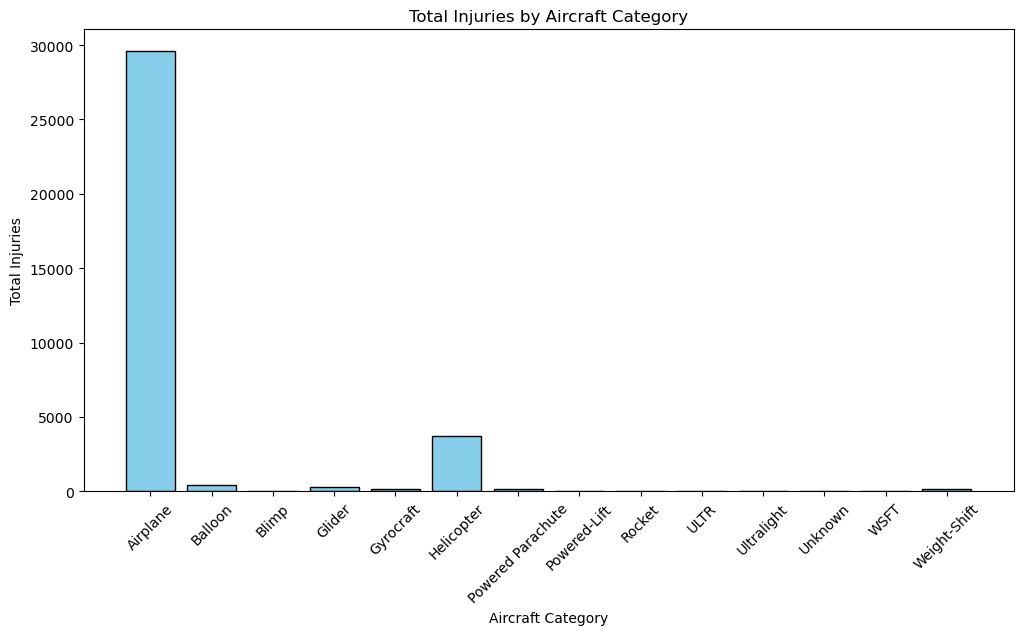

In [65]:
# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot
bars = ax.bar(total_injuries_by_category['Aircraft.Category'], total_injuries_by_category['Total.Injuries'], color='skyblue',edgecolor ='black')

# Add title and labels
ax.set_title('Total Injuries by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Injuries')

# Rotate x-ticks for better readability
ax.tick_params(axis='x', rotation=45)



The data is grouped by aircraft category to count the total injuries for each category. This approach allows us to see how injuries are distributed across different types of aircraft.This categorization helps in identifying safety concerns unique to each type of aircraft.The airplane is the category that is associated with most injury severity distribution although one of the factors is because it is mostly used for commercial and private purposes.

Airplanes dominate the dataset, with many entries and a wide range of injury totals. Conversely, categories like "Weight-Shift" and "Helicopter" seem to have fewer entries and lower total injuries.
The prevalence of airplanes in accidents could be related to their higher usage in commercial and private sectors compared to other types.

## 4. Occurences of Weather Conditions 

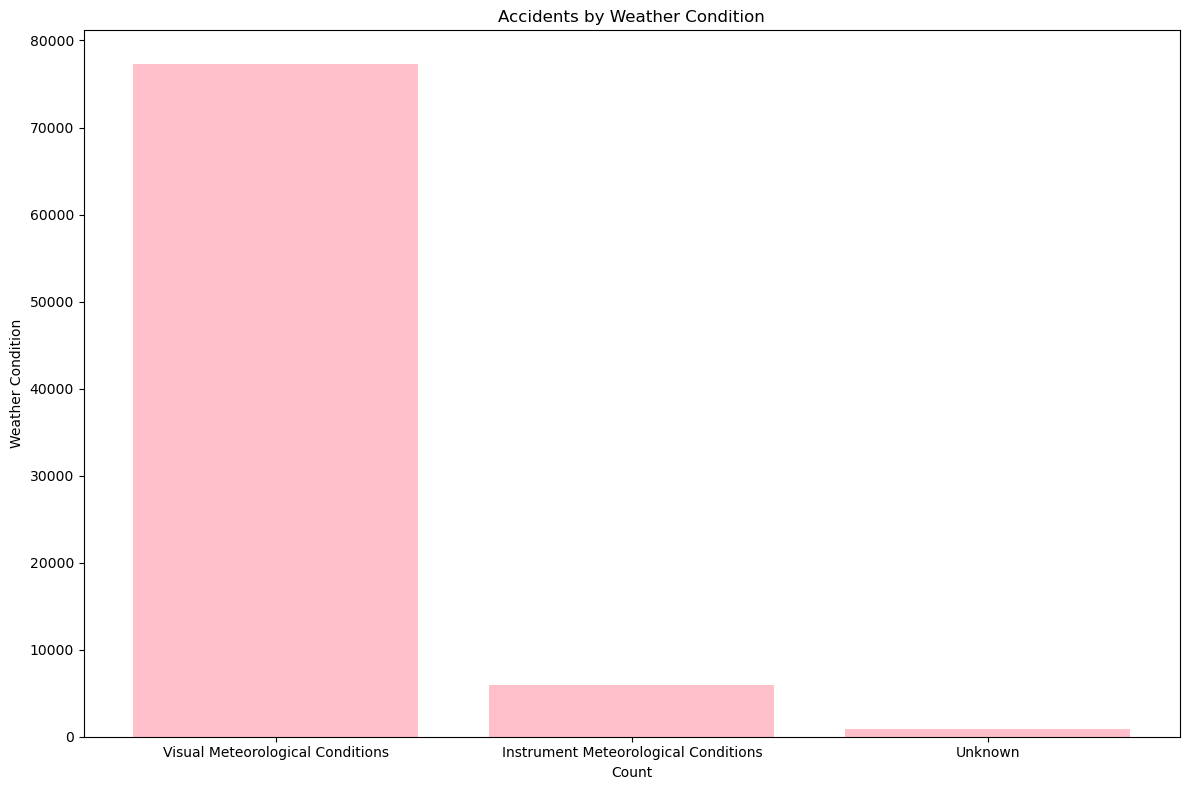

In [26]:
# Count the occurrences of each weather condition
weather_counts = df['Weather.Condition'].value_counts()

# Prepare data for plotting
conditions = weather_counts.index
counts = weather_counts.values
label_mapping = {
    'VMC': 'Visual Meteorological Conditions',
    'IMC': 'Instrument Meteorological Conditions',
    'Unk': 'Unknown',
    'UNK': 'Unknown',
}    
    

# Replace the conditions with their longer descriptions
long_conditions = [label_mapping.get(condition, condition) for condition in conditions]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(long_conditions, counts, color='pink')

# Add title and labels
ax.set_title('Accidents by Weather Condition')
ax.set_xlabel('Count')
ax.set_ylabel('Weather Condition')


plt.tight_layout()  # Adjust layout for better fitting
plt.savefig('Documents/Image4.png', format='png', dpi=300)
plt.show();

This visualization examines the impact of weather conditions on accident occurrence. Identifying which weather scenarios are most prevalent during accidents can help in developing training programs and operational guidelines to mitigate risks associated with adverse weather.Visual Meteorological Conditions is the highest since it provides ideal conditions for which pilots have sufficiently visibility to fly.

## 5.Occurences of phase of flight

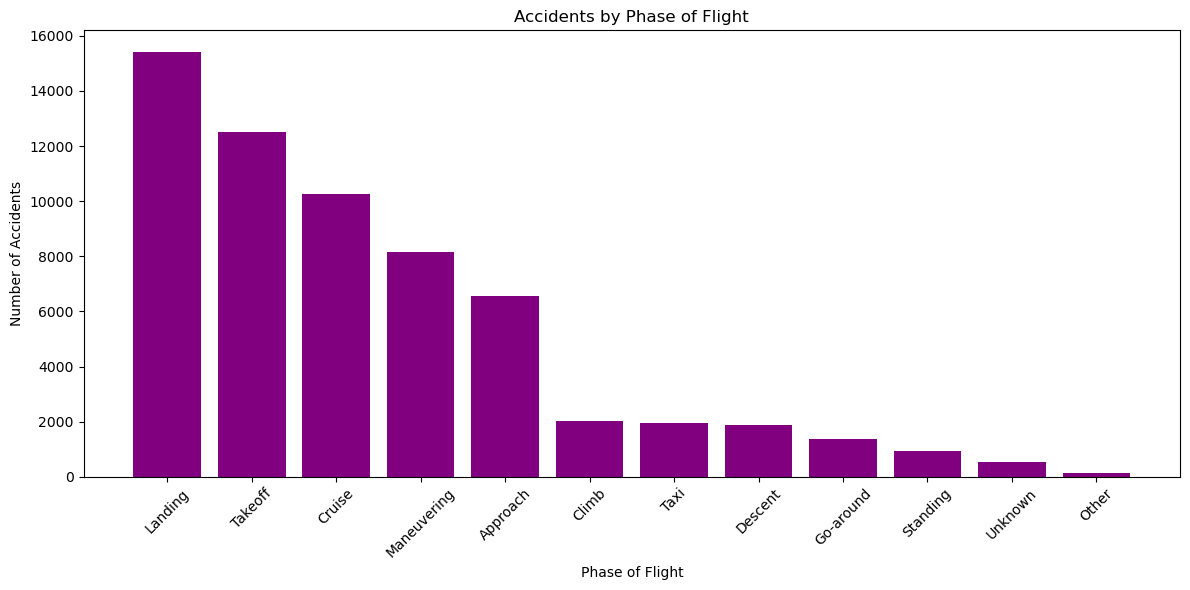

In [57]:
import matplotlib.pyplot as plt

# Count the occurrences of each phase of flight
phase_counts = df['Broad.phase.of.flight'].value_counts()

# Prepare data for plotting
phases = phase_counts.index
counts = phase_counts.values

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(phases, counts, color='purple')

# Add title and labels
ax.set_title('Accidents by Phase of Flight')
ax.set_xlabel('Phase of Flight')
ax.set_ylabel('Number of Accidents')

# Rotate x-ticks for better readability
ax.tick_params(axis='x', rotation=45)


plt.tight_layout()  # Adjust layout for better fitting
plt.show();

This chart illustrates the distribution of accidents based on the phase of flight. Identifying phases with higher incident rates can inform targeted safety training for pilots, emphasizing critical areas of focus during takeoff, cruising, and landing.This graph shows that the majority of the accidents take place during the landing phase.

## 6. Total Uninjured by Aircraft Make

In [12]:
# Group by Aircraft Make and sum the Total Uninjured
grouped_data = df_clean.groupby('Make')['Total.Uninjured'].sum().reset_index()

# Sort the results for better visibility
sorted_data = grouped_data.sort_values(by='Total.Uninjured', ascending=False).head(10)
print(sorted_data)

                  Make  Total.Uninjured
71              Cessna           1662.0
50              Boeing           1386.0
212              Piper            926.0
180  Mcdonnell Douglas            854.0
95             Douglas            374.0
33               Beech            370.0
35                Bell            167.0
182  Mcdonnell-douglas            154.0
169           Lockheed            152.0
11    Airbus Industrie            146.0


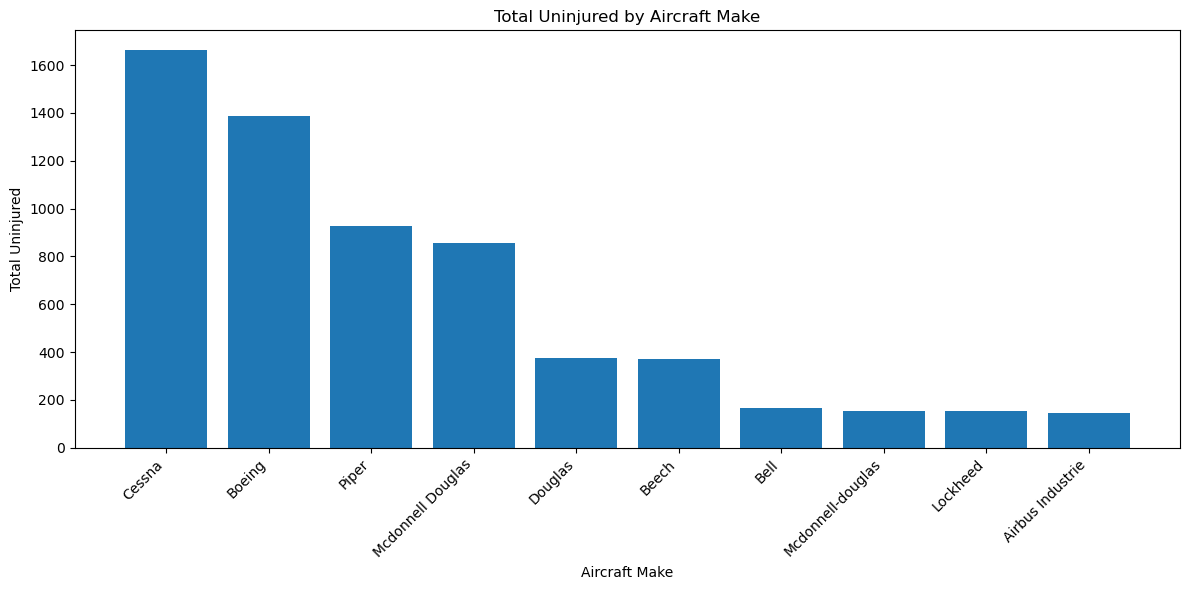

In [23]:

#plot the data
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['Make'], sorted_data['Total.Uninjured'])
plt.title('Total Uninjured by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Uninjured')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Documents/Image3.png', format='png', dpi=300)
plt.show();

## CONCLUSION 

Although Cessna is seen as the aircraft make that has many total injury severity it is still the one with the highest total uninjured compared to other makes this confirms that Cessna being the aircraft make that is highly used. In order to ensure low-risk aircraft operations we need to ensure standard and safety measures are put in place escpecially during landing phase of flight,weather conditions that favour air transportation. OVer the years, the aviation accident has also been reduced due to the improvement of technology as years goes by.